In [0]:
# Get text data from url
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/files/113/113-0.txt","/tmp/bigDataProject.txt")

Out[144]: ('/tmp/bigDataProject.txt', <http.client.HTTPMessage at 0x7ff7cb0db3a0>)

In [0]:
dbutils.fs.mv("file:/tmp/bigDataProject.txt","dbfs:/data/bigDataProject.txt")

Out[145]: True

In [0]:
nodeRDD = sc.textFile("dbfs:/data/bigDataProject.txt")

In [0]:
# flatmap each line to words
wordsRDD = nodeRDD.flatMap(lambda line: line.lower().strip().split(" ") )

In [0]:
# Removing non-letters using regular expression and map().
import re
no_regularRDD = wordsRDD.map(lambda word: re.sub('[^a-zA-Z]','',word))


In [0]:
# Removing stop words in wordsRDD
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopWords = remove.getStopWords()
filteredRDD=no_regularRDD.filter(lambda word: word not in stopWords)
proper_wordsRDD = filteredRDD.filter(lambda x: x != "")

In [0]:
# map() words to (word,1) intemediate key-value pairs
IKVPairsRDD = proper_wordsRDD.map(lambda word: (word,1))

In [0]:
# reduceByKey() to get (word,count) results
wordCountRDD = IKVPairsRDD.reduceByKey(lambda acc,value: acc+value)

In [0]:
# collect() action to get back to python
results = wordCountRDD.collect()
print(results)

[('project', 88), ('gutenberg', 31), ('ebook', 13), ('secret', 74), ('garden', 228), ('burnett', 3), ('use', 17), ('anyone', 44), ('anywhere', 8), ('united', 15), ('world', 46), ('restrictions', 2), ('whatsoever', 2), ('may', 42), ('give', 41), ('away', 116), ('reuse', 2), ('online', 4), ('check', 4), ('country', 8), ('using', 7), ('title', 1), ('language', 5), ('set', 37), ('encoding', 1), ('utf', 1), ('start', 10), ('shuttle', 1), ('making', 32), ('marchioness', 1), ('lady', 9), ('walderhurst', 1), ('lowries', 1), ('quality', 1), ('contents', 1), ('mary', 669), ('quite', 183), ('contrary', 20), ('iii', 2), ('moor', 92), ('iv', 2), ('cry', 12), ('corridor', 26), ('vi', 2), ('robin', 104), ('showed', 23), ('way', 120), ('strangest', 5), ('house', 60), ('ever', 120), ('lived', 30), ('dickon', 277), ('nest', 22), ('earth', 58), ('xiii', 2), ('colin', 302), ('xiv', 2), ('young', 71), ('rajah', 24), ('said', 829), ('munnot', 6), ('xx', 2), ('live', 41), ('everand', 2), ('xxi', 2), ('ben', 133), ('weatherstaff', 100), ('sun', 36), ('xxiv', 2), ('let', 64), ('laugh', 28), ('xxv', 2), ('curtain', 14), ('xxvii', 2), ('chapter', 27), ('lennox', 17), ('sent', 24), ('misselthwaite', 34), ('child', 60), ('seen', 67), ('true', 11), ('hair', 20), ('expression', 17), ('yellow', 5), ('always', 107), ('ill', 94), ('father', 34), ('position', 1), ('beauty', 5), ('cared', 2), ('go', 162), ('amuse', 7), ('handed', 3), ('ayah', 23), ('understand', 21), ('mem', 6), ('must', 107), ('possible', 15), ('sickly', 6), ('fretful', 8), ('kept', 24), ('never', 184), ('seeing', 7), ('anything', 57), ('dark', 25), ('native', 15), ('obeyed', 1), ('gave', 39), ('everything', 37), ('crying', 31), ('years', 45), ('tyrannical', 1), ('governess', 8), ('came', 95), ('read', 23), ('disliked', 6), ('three', 19), ('months', 5), ('try', 32), ('fill', 2), ('shorter', 1), ('really', 51), ('know', 176), ('books', 19), ('letters', 9), ('frightfully', 1), ('hot', 21), ('cross', 16), ('stood', 69), ('strange', 50), ('send', 19), ('looked', 224), ('frightened', 27), ('threw', 15), ('passion', 6), ('beat', 7), ('kicked', 1), ('missie', 2), ('something', 98), ('mysterious', 17), ('regular', 2), ('several', 16), ('seemed', 138), ('ashy', 1), ('scared', 2), ('tell', 103), ('last', 58), ('tree', 49), ('near', 41), ('veranda', 3), ('pretended', 2), ('flowerbed', 5), ('stuck', 6), ('scarlet', 7), ('muttering', 2), ('things', 200), ('say', 71), ('names', 10), ('call', 17), ('daughter', 4), ('worst', 9), ('insult', 1), ('teeth', 3), ('saying', 22), ('heard', 95), ('talking', 20), ('low', 32), ('voices', 6), ('like', 344), ('boy', 103), ('officer', 4), ('england', 11), ('stared', 34), ('chance', 6), ('sahibmary', 1), ('used', 44), ('elsewas', 1), ('slim', 1), ('pretty', 25), ('person', 30), ('lovely', 23), ('silk', 6), ('nose', 14), ('disdaining', 1), ('large', 10), ('eyes', 133), ('floating', 2), ('full', 47), ('fuller', 2), ('lifted', 16), ('imploringly', 1), ('officers', 4), ('oh', 37), ('awfully', 2), ('answered', 136), ('two', 65), ('weeks', 5), ('ago', 19), ('fool', 1), ('sound', 36), ('wailing', 3), ('quarters', 3), ('clutched', 4), ('head', 85), ('turned', 64), ('ran', 32), ('appalling', 1), ('happened', 25), ('mysteriousness', 2), ('fatal', 1), ('form', 5), ('night', 38), ('huts', 2), ('others', 12), ('run', 32), ('terror', 4), ('panic', 1), ('bungalows', 1), ('confusion', 1), ('nobody', 21), ('thought', 163), ('slept', 10), ('hours', 12), ('sounds', 26), ('though', 50), ('partly', 3), ('meal', 3), ('plates', 4), ('hastily', 2), ('pushed', 21), ('diners', 1), ('rose', 14), ('suddenly', 44), ('drank', 3), ('glass', 6), ('wine', 2), ('filled', 13), ('sweet', 9), ('intensely', 2), ('drowsy', 3), ('cries', 2), ('open', 41), ('long', 112), ('heavily', 5), ('carried', 10), ('bungalow', 7), ('perfectly', 2), ('known', 14), ('neither', 18), ('got', 110), ('trouble', 11), ('take', 45), ('new', 59), ('perhaps', 79), ('rather', 73), ('nurse', 61), ('think', 123), ('fond', 16), ('surely', 

In [0]:
# Finding top 10 words
top_10_words = wordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(top_10_words)

[(829, 'said'), (669, 'mary'), (369, 'th'), (344, 'like'), (334, 'one'), (302, 'colin'), (277, 'dickon'), (228, 'garden'), (224, 'looked'), (222, 'little')]

word count
0 829 said
1 669 mary
2 369 th
3 344 like
4 334 one
5 302 colin
6 277 dickon
7 228 garden
8 224 looked
9 222 little
Out[154]:

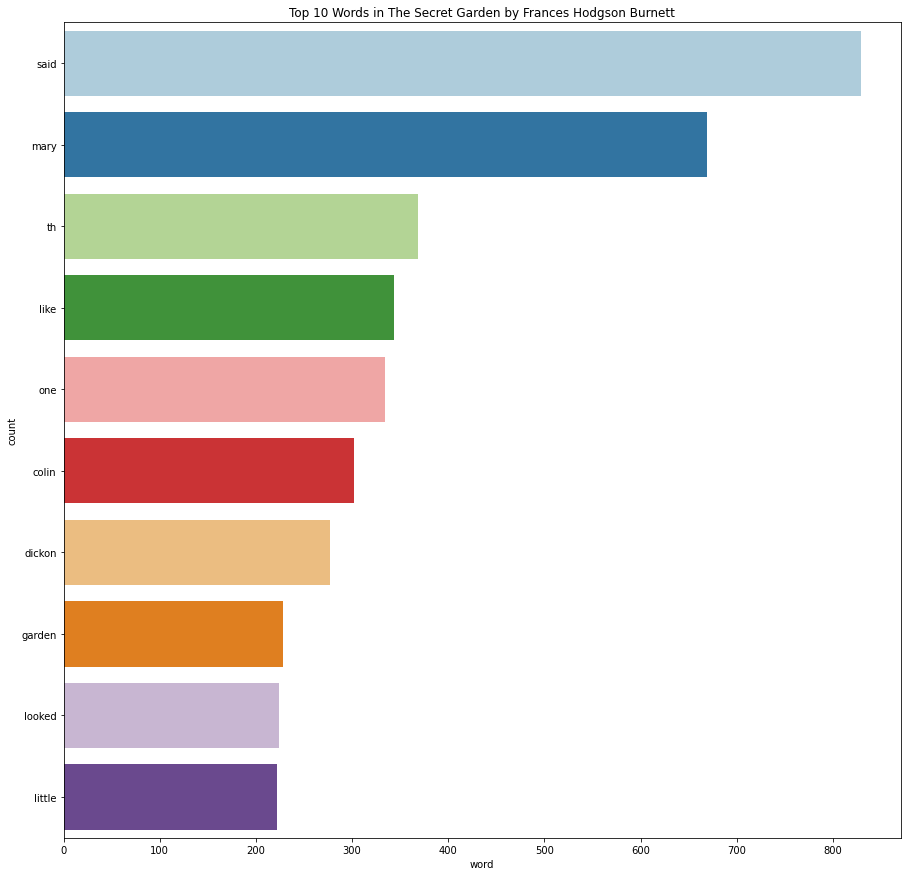

Text(0.5, 1.0, 'Top 10 Words in The Secret Garden by Frances Hodgson Burnett')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# More about numpy from https://numpy.org/
# More about pandas from https://pandas.pydata.org/
# More about matplotlib from https://matplotlib.org/
# More about seaborn from https://seaborn.pydata.org/
# More about collections from https://docs.python.org/3/library/collections.html#collections.Counter



# prepare chart information
source = 'The Secret Garden by Frances Hodgson Burnett'
title = 'Top 10 Words in ' + source
xlabel = 'word'
ylabel = 'count'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(top_10_words, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(15,15))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)
# Color Palette
# Blues_d
# BuPu_r
# Greens_d
# Reds_d
# Paried
# rocket
